[[  85.52242    32.051617]
 [ 610.7287     33.109924]
 [ 603.1834     40.88004 ]
 ...
 [ 984.64465   556.7147  ]
 [1107.6263    600.8431  ]
 [1196.0453    612.52496 ]]


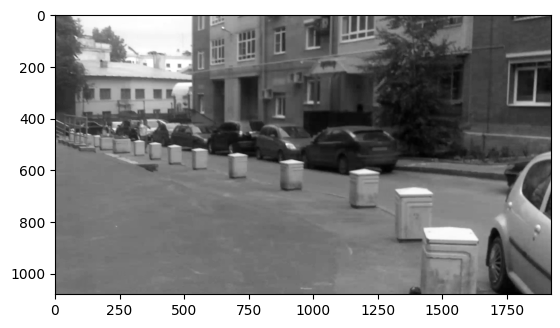

In [12]:
from matplotlib import pyplot as plt
import numpy as np
import cv2 as cv


ref_img = cv.imread("../data/optflow/1080p_00.png", cv.IMREAD_GRAYSCALE)
cur_img = cv.imread("../data/optflow/1080p_00.png", cv.IMREAD_GRAYSCALE)


akaze = cv.AKAZE_create(max_points=5000)
kps, des = akaze.detectAndCompute(ref_img, None)
ref_kps = np.array([(kp.pt[0], kp.pt[1]) for kp in kps], dtype=np.float32)
#print(ref_kps)

lk_params = dict(winSize  = (21, 21), 
                maxLevel = 3,
                criteria = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 30, 0.01))

bit = cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT

kp2, st, err = cv.calcOpticalFlowPyrLK(ref_img, cur_img, ref_kps, None, **lk_params) 
print(kp2)

plt.imshow(ref_img, cmap='gray')

